In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x = np.arange(1,10+1)
y = np.array([2,4,5,8,7,8,5,9,12,30])

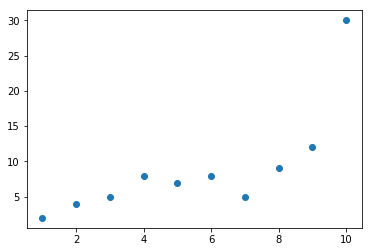

In [12]:
plt.scatter(x,y)
plt.show()

In [13]:
# error functions
# err1 = @(y1,y2) XXX;
# err2 = @(y1,y2) XXX;

def err1(y1,y2):
    return abs(y1-y2)

def err2(y1,y2):
    return (y1-y2)**2

#approximate range
mrange = np.arange(-5,5,.1);
crange = np.arange(-5,5,.1);

errL1 = np.zeros((len(mrange),len(crange)));
errL2 = np.zeros((len(mrange),len(crange)));

#  grid search
for ii in range(len(mrange)):
    for jj in range(len(crange)):
        y2 = crange[jj]  + mrange[ii] * x
        errL1[ii][jj] = sum(err1(y,y2))
        
for ii in range(len(mrange)):
    for jj in range(len(crange)):
        y2 = crange[jj]  + mrange[ii] * x
        errL2[ii][jj] = np.sqrt(sum(err2(y,y2)))

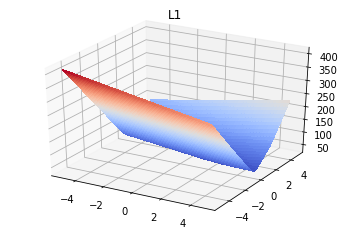

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
ax = fig.gca(projection='3d')
 
X, Y = np.meshgrid(mrange, crange)

Z = errL1

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.title('L1')
plt.show()

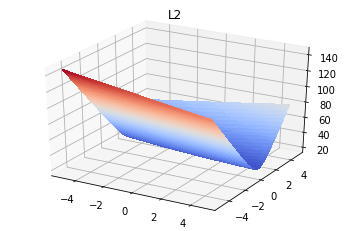

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')
 
X, Y = np.meshgrid(mrange, crange)

Z = errL2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.title('L2')
plt.show()

In [18]:
mL1 = (np.where(errL1 == errL1.min())[0][0]-50)*.1
print(mL1)
cL1 = (np.where(errL1 == errL1.min())[1][0]-50)*.1
print(cL1)

1.2000000000000002
1.1


In [20]:
mL2 = (np.where(errL2 == errL2.min())[0][0]-50)*.1
print(mL2)
cL2 = (np.where(errL2 == errL2.min())[1][0]-50)*.1
print(cL2)

1.9000000000000001
-1.4000000000000001


In [21]:
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Total number of values
l = len(x)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(l):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

# Print coefficients
print(m, c)

1.9393939393939394 -1.6666666666666679


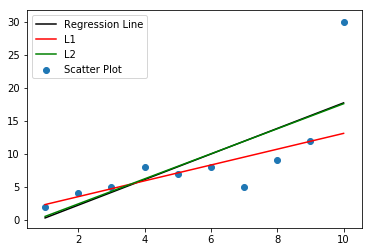

In [22]:
# Plotting Values and Regression Line

max_x = np.max(x) 
min_x = np.min(x) 

# Calculating line values x and y
x_ = x
y_ = c + m * x

# Ploting Line
plt.plot(x_, y_, label='Regression Line',c= 'k')
# # Ploting Scatter Points
plt.scatter(x, y,label='Scatter Plot')

y_L1 = mL1*x + cL1
y_L2 = mL2*x + cL2
plt.plot(x_, y_L1, label='L1',c= 'r')
plt.plot(x_, y_L2, label='L2',c= 'g')

plt.legend()
plt.show()